# LISTA 3 DE MÉTODOS NUMÉRICOS I

Interpolação Polinomial

## Importando os pacotes que serão utilizados

In [1]:
from methods.polynomial_interpolation import lagrange_interpolation
from utils.parser import evaluate_one_variable
from matplotlib import pyplot as plt
from numpy.typing import NDArray
import numpy as np

## Resolução das questões

### Questão 2

Dada a função f (x) = ln(x + 1), e os pontos x0=0,0; x1=0,6; x2=0,9 e x3 =1,1. Construa os polinômios de interpolação de Lagrange nos seguintes casos:
- a) Polinômio de grau 1, com os pontos x0 e x3 ,
- b) Polinômio de grau 2, com os pontos x0 , x1 e x3 ,
- c) Polinômio de grau 3, com os pontos x0 , x1 , x2 e x3 .

In [2]:
func:str = "ln(x + 1)"
degree:list[int] = list(range(1,4))
points:NDArray = np.array([0.0, 0.6, 0.9, 1.1], dtype=np.float64)
xi:np.float64
specific_points:NDArray
pointwise_matrix:NDArray

#### Caso a)

In [3]:
specific_points:NDArray = np.array([points[0], points[3]])
pointwise_matrix:NDArray = np.array([specific_points,
                                     [evaluate_one_variable(func, point) for point in specific_points]],
                                    dtype=np.float64)

In [4]:
xi = np.float64(0.3)
lagrange_interpolation(pointwise_matrix, xi)

np.float64(0.20234654856255743)

In [5]:
xi = np.float64(0.75)
lagrange_interpolation(pointwise_matrix, xi)

np.float64(0.5058663714063936)

#### Caso b)

In [6]:
specific_points = np.array([points[0], points[1], points[3]])
pointwise_matrix = np.array([specific_points,
                            [evaluate_one_variable(func, point) for point in specific_points]],
                            dtype=np.float64)

In [7]:
xi = np.float64(0.3)
lagrange_interpolation(pointwise_matrix, xi)

np.float64(0.254594974259054)

In [8]:
xi = np.float64(0.75)
lagrange_interpolation(pointwise_matrix, xi)

np.float64(0.5630130870119368)

#### Caso c)

In [9]:
pointwise_matrix = np.array([points,
                            [evaluate_one_variable(func, point) for point in points]],
                            dtype=np.float64)

In [10]:
xi = np.float64(0.3)
lagrange_interpolation(pointwise_matrix, xi)

np.float64(0.2604244126425875)

In [11]:
xi = np.float64(0.75)
lagrange_interpolation(pointwise_matrix, xi)

np.float64(0.559825112895942)

### Questão 3

A função de Runge é definida como f(x) = 1/(1 + x^2).
- a) Desejamos construir o polinômio interpolante de Lagrange no intervalo [−5,5] com pontos equidistantes para n = 4, 6, 8 e 12.
- b) Em cada caso construa um gráfico contendo a função de Runge, os pontos de interpolação e o Polinômio de Lagrange.
- c) A partir dos gráficos comente sobre a acurácia da interpolação no centro do intervalo, e nos extremos. Explique o comportamento observado.
- d) Pesquise na literatura e encontre uma alternativa para aprimorar a interpolação descartando o uso de Splines ou qualquer estratégia de interpolação por partes.

#### Caso a)

In [12]:
func:str = "1 / (1 + x**2)"
degree:list[int] = [4, 6, 8, 12]
equidistant_points:list[NDArray] = []
y:list[NDArray] = []
x_interpolated:NDArray = np.linspace(-5, 5, 11, dtype=np.float64)
y_interpolated:list[list] = [[] for _ in range(len(degree))]
y_true:NDArray = np.array([evaluate_one_variable(func, point) for point in x_interpolated], dtype=np.float64)


for n in degree:
    points:NDArray = np.linspace(-5, 5, n + 1, dtype=np.float64)
    equidistant_points.append(points)
    y.append(np.array([evaluate_one_variable(func, point) for point in points], dtype=np.float64))

equidistant_points

[array([-5. , -2.5,  0. ,  2.5,  5. ]),
 array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
         3.33333333,  5.        ]),
 array([-5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ]),
 array([-5.        , -4.16666667, -3.33333333, -2.5       , -1.66666667,
        -0.83333333,  0.        ,  0.83333333,  1.66666667,  2.5       ,
         3.33333333,  4.16666667,  5.        ])]

In [13]:
for n in range(len(degree)):
    for element in equidistant_points[n]:
        print(element, end=" ")
        print(evaluate_one_variable(func, element))
    
    print("======================\n")

-5.0 0.038461538461538464
-2.5 0.13793103448275862
0.0 1.0
2.5 0.13793103448275862
5.0 0.038461538461538464

-5.0 0.038461538461538464
-3.333333333333333 0.08256880733944956
-1.6666666666666665 0.26470588235294124
0.0 1.0
1.666666666666667 0.2647058823529411
3.333333333333334 0.08256880733944952
5.0 0.038461538461538464

-5.0 0.038461538461538464
-3.75 0.06639004149377593
-2.5 0.13793103448275862
-1.25 0.3902439024390244
0.0 1.0
1.25 0.3902439024390244
2.5 0.13793103448275862
3.75 0.06639004149377593
5.0 0.038461538461538464

-5.0 0.038461538461538464
-4.166666666666667 0.054462934947049915
-3.333333333333333 0.08256880733944956
-2.5 0.13793103448275862
-1.6666666666666665 0.26470588235294124
-0.833333333333333 0.5901639344262297
0.0 1.0
0.8333333333333339 0.5901639344262292
1.666666666666667 0.2647058823529411
2.5 0.13793103448275862
3.333333333333334 0.08256880733944952
4.166666666666668 0.054462934947049894
5.0 0.038461538461538464



In [14]:
for i in range(len(equidistant_points)):
    # Criando matriz de pontos no formato correto
    pointwise_matrix = np.array([equidistant_points[i],
                                y[i]],
                                dtype=np.float64)

    # Interpolando para cada ponto em x_interpolated
    for point in x_interpolated:
        y_interpolated[i].append(lagrange_interpolation(pointwise_matrix, point))

#### Caso b)

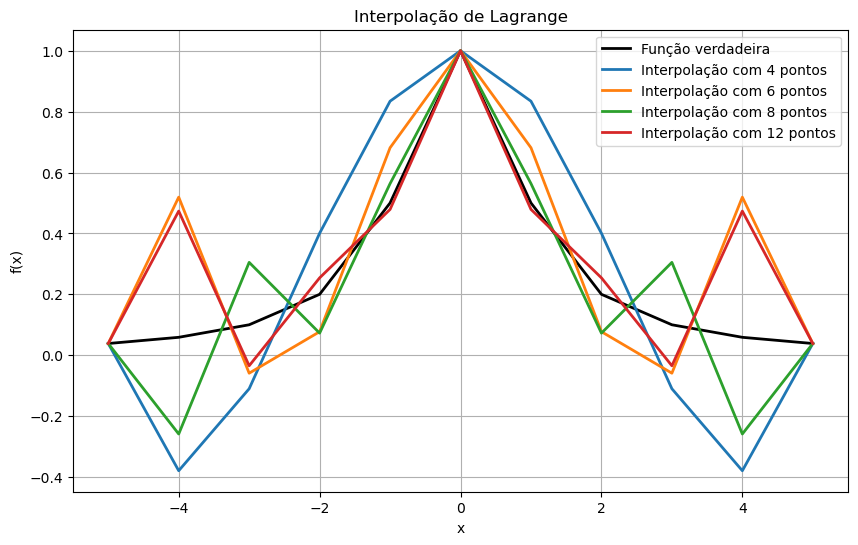

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_interpolated, y_true, label="Função verdadeira", color="black", linewidth=2)
for i in range(len(equidistant_points)):
    ax.plot(x_interpolated, y_interpolated[i], label=f"Interpolação com {degree[i]} pontos", linewidth=2)
ax.legend()
ax.set_title("Interpolação de Lagrange")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
plt.grid()
plt.show()
# Exemplo de uso da função de interpolação de Lagrange

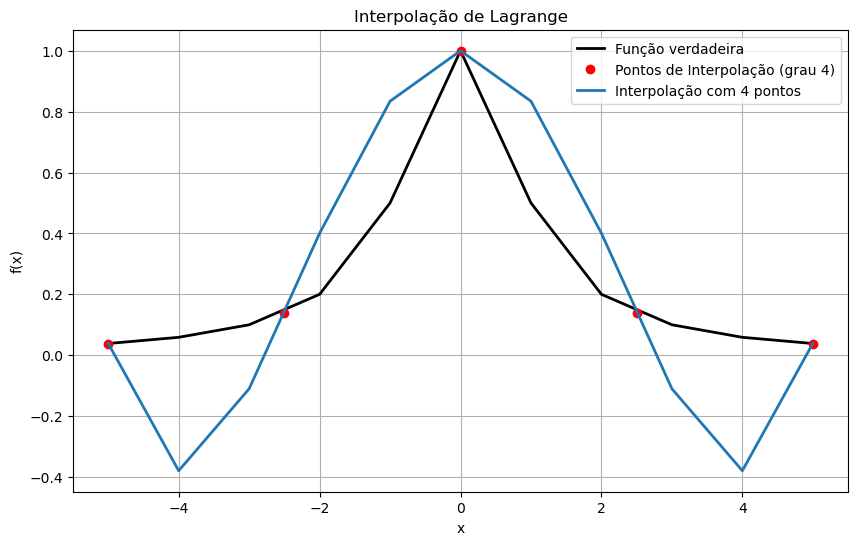

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_interpolated,
        y_true,
        label="Função verdadeira",
        color="black",
        linewidth=2)
ax.plot(equidistant_points[0],
        y[0],
        'o', color='red',
        markersize=6,
        label=f"Pontos de Interpolação (grau {degree[0]})")
ax.plot(x_interpolated,
        y_interpolated[0],
        label=f"Interpolação com {degree[0]} pontos", linewidth=2)
ax.legend()
ax.set_title("Interpolação de Lagrange")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
plt.grid()
plt.show()

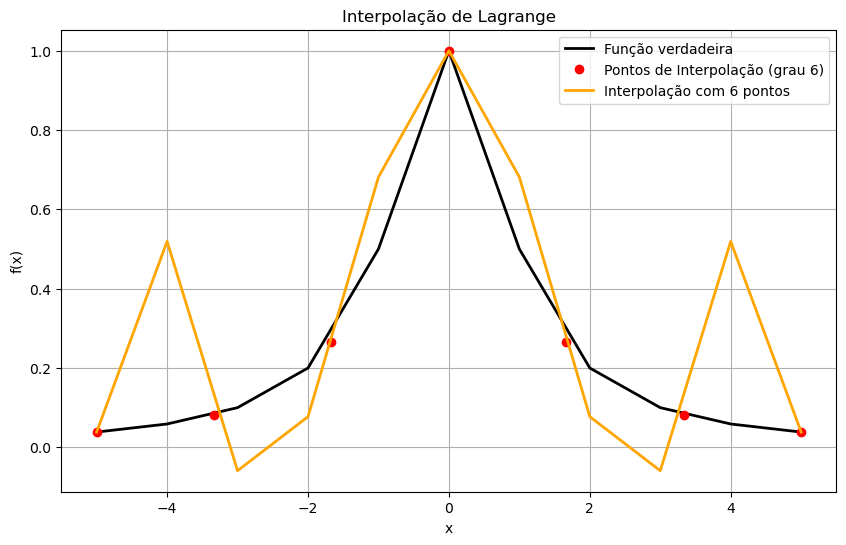

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_interpolated,
        y_true,
        label="Função verdadeira",
        color="black",
        linewidth=2)
ax.plot(equidistant_points[1],
        y[1],
        'o', color='red',
        markersize=6,
        label=f"Pontos de Interpolação (grau {degree[1]})")
ax.plot(x_interpolated,
        y_interpolated[1],
        color="orange",
        label=f"Interpolação com {degree[1]} pontos", linewidth=2)
ax.legend()
ax.set_title("Interpolação de Lagrange")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
plt.grid()
plt.show()

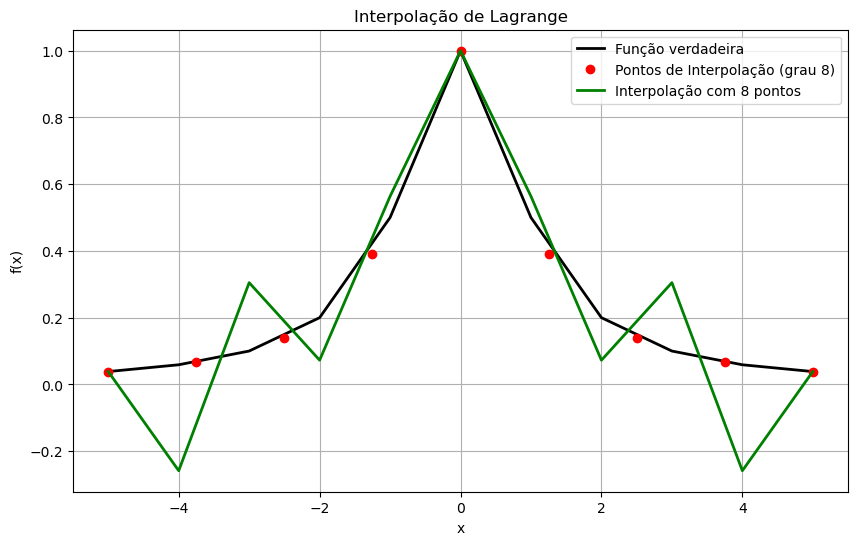

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_interpolated,
        y_true,
        label="Função verdadeira",
        color="black",
        linewidth=2)
ax.plot(equidistant_points[2],
        y[2],
        'o', color='red',
        markersize=6,
        label=f"Pontos de Interpolação (grau {degree[2]})")
ax.plot(x_interpolated,
        y_interpolated[2],
        color="green",
        label=f"Interpolação com {degree[2]} pontos", linewidth=2)
ax.legend()
ax.set_title("Interpolação de Lagrange")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
plt.grid()
plt.show()

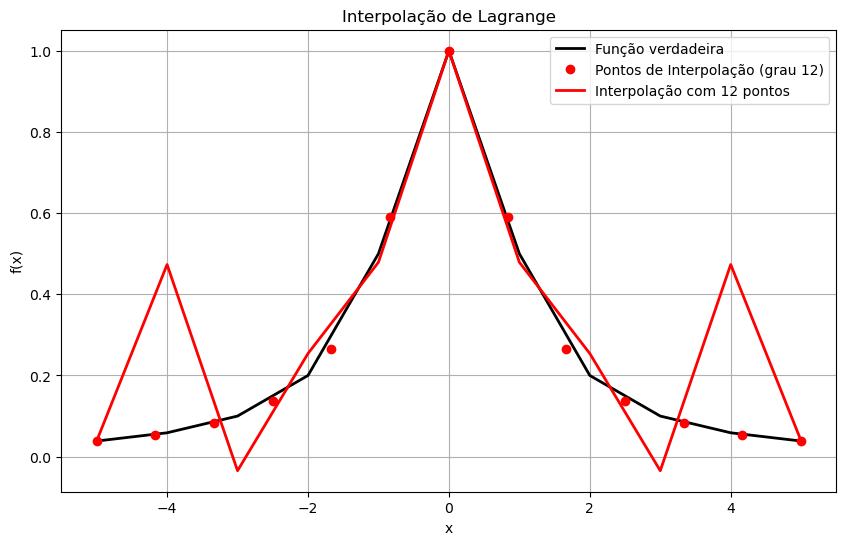

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_interpolated,
        y_true,
        label="Função verdadeira",
        color="black",
        linewidth=2)
ax.plot(equidistant_points[3],
        y[3],
        'o', color='red',
        markersize=6,
        label=f"Pontos de Interpolação (grau {degree[3]})")
ax.plot(x_interpolated,
        y_interpolated[3],
        color="red",
        label=f"Interpolação com {degree[3]} pontos", linewidth=2)
ax.legend()
ax.set_title("Interpolação de Lagrange")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
plt.grid()
plt.show()